# Assignment 5

 ## Instructions

• Load the file melb_data.csv

• The following instructions are valid for numeric data only

• Clean (deal with missing values) the data according to your judgment. Provide a
short description (as comment in the code) why you used the approach you used

• Create a figure with many axeses, each representing the distribution of one of the
numerical variables. Save it to a file

• Apply normalization/standardization/binning according to your judgment. Provide
a short description (as comment in the code) why you used the approach you used

• Create a figure with many axeses, each representing the distribution of one of the
variables of the corrected dataframe. Save it to a file

• Create a figure with many axes (one for each variable). In each axes display both
histograms, before and after the correction


## Code

## Importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing data

In [2]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Cleaning data

In [3]:
# select numerical values only
df2 = df.select_dtypes(include='number')

# checking for null
print("Columns including null values:")
for i in df2.columns:
    if df[i].isnull().values.any() == True:
        print(i)
    else:
        continue

Columns including null values:
Car
BuildingArea
YearBuilt


## Filling missing data

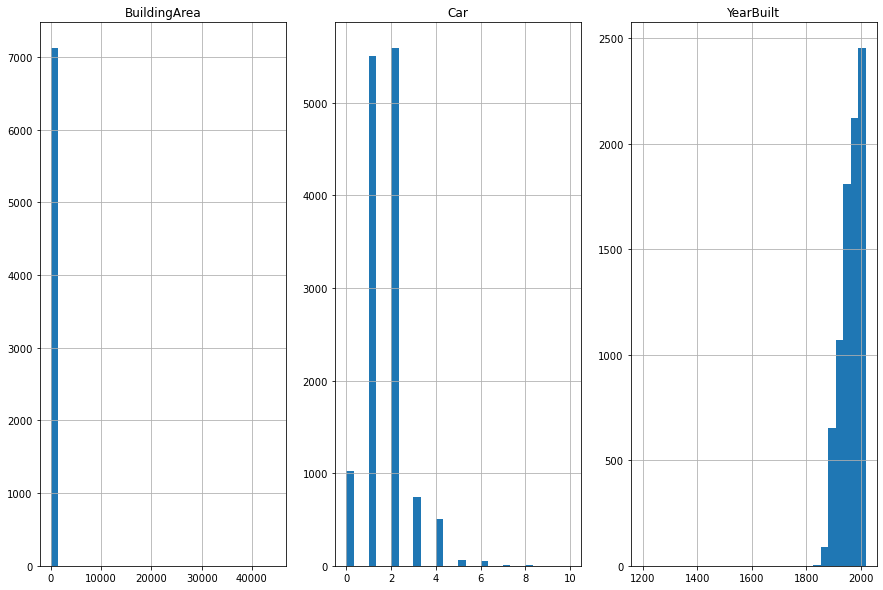

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
0,2,1480000.0,2.5,3067.0,2.0,1.0,1.0,202.0,126.0,1970.0,-37.7996,144.9984,4019.0
1,2,1035000.0,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0
2,3,1465000.0,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0
3,3,850000.0,2.5,3067.0,3.0,2.0,1.0,94.0,126.0,1970.0,-37.7969,144.9969,4019.0
4,4,1600000.0,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0


In [4]:
# to decide which aproximation to use to replace null values with I use the histograms to visualize the distributions
for i, column in enumerate(df2[["BuildingArea", "Car", "YearBuilt"]].columns):
    ax = plt.subplot(1, 3, i + 1)
    df[column].hist(bins = 30, ax = ax, figsize = (15, 10))
    ax.set_title(column) # nad vsak graf damo naslov grafa, ki je enak imenom atributov
plt.show()

# I choose the median because based on the higly skeweed distribution mean value or 0 are not the most appropriate approximation
df2 = df2.fillna(df2.median())
df2.head()


In [5]:
# fucntion that can be used for graphs

def draw_histogram(df, name="", n=5, m=3, top = 0.9, dpi=500):
    df = df[sorted(df)]
    for i, column in enumerate(df.columns):
        ax = plt.subplot(n, m, i + 1)
        df[column].hist(bins = 30, ax = ax, figsize = (15, 15))
        ax.set_title(column)
        plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=top, wspace=0.4, hspace=0.4)
        if name !="":
            pass
        else:  
            plt.savefig(f"{name}.jpg", dpi = dpi)
    return plt.show()

## Histograms of initial values

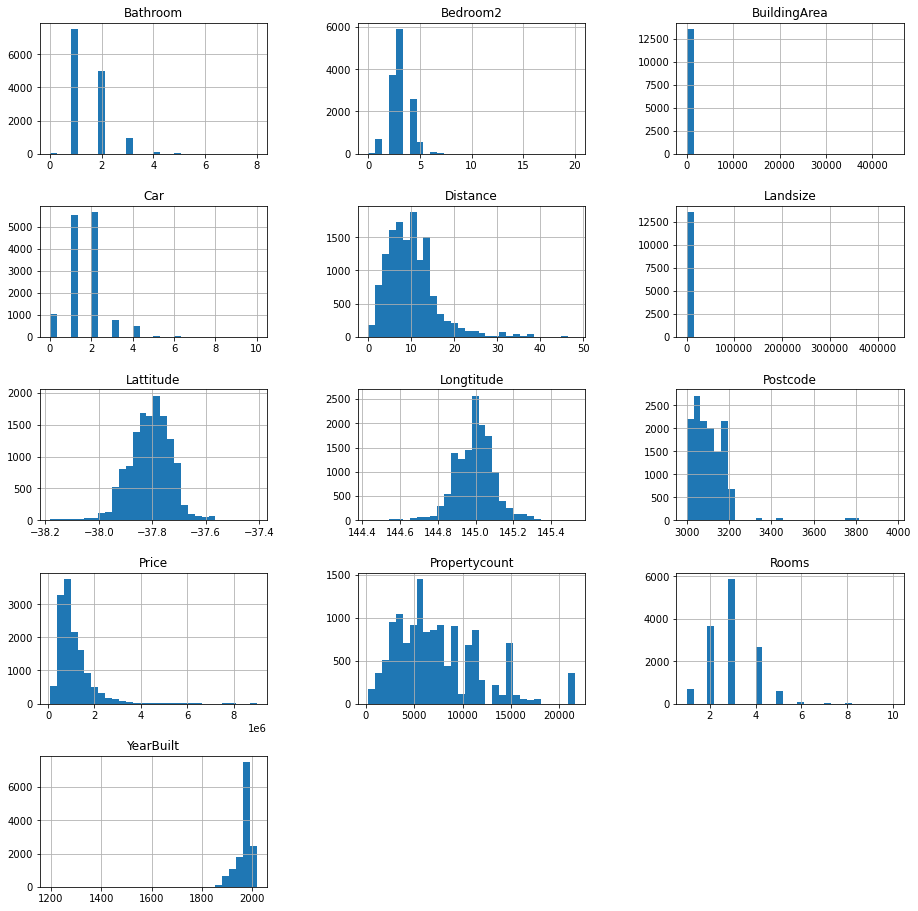

In [6]:
draw_histogram(df2,"HistogramNotModified")

In [6]:
# normalization

# I have chosen the normalization technique because the majority of variables are not normally distributed with large differences between and within min-max scalling further analysis may be distorted
# I do not have infinite values so I have not decided to use standardization

def normalize(df):
    dfMod = df.copy()
    for column in dfMod.columns:
        dfMod[column] =(dfMod[column]-dfMod[column].min())/(dfMod[column].max()-dfMod[column].min())
        dfMod = dfMod.rename(columns = {column:f"{column}Normalized"})
    return dfMod

dfMod = normalize(df2)
dfMod.head()

,RoomsNormalized,PriceNormalized,DistanceNormalized,PostcodeNormalized,Bedroom2Normalized,BathroomNormalized,CarNormalized,LandsizeNormalized,BuildingAreaNormalized,YearBuiltNormalized,LattitudeNormalized,LongtitudeNormalized,PropertycountNormalized
0,0.111111,0.156478,0.051975,0.068577,0.10,0.125,0.1,0.000466,0.002831,0.941606,0.494755,0.517651,0.17616
1,0.111111,0.106562,0.051975,0.068577,0.10,0.125,0.0,0.000360,0.001775,0.856448,0.484031,0.513083,0.17616
2,0.222222,0.154795,0.051975,0.068577,0.15,0.250,0.0,0.000309,0.003370,0.856448,0.482223,0.513997,0.17616
3,0.222222,0.085810,0.051975,0.068577,0.15,0.250,0.1,0.000217,0.002831,0.941606,0.498243,0.516281,0.17616
4,0.333333,0.169938,0.051975,0.068577,0.15,0.125,0.2,0.000277,0.003190,0.995134,0.484936,0.513723,0.17616


## Histogram of normalized values

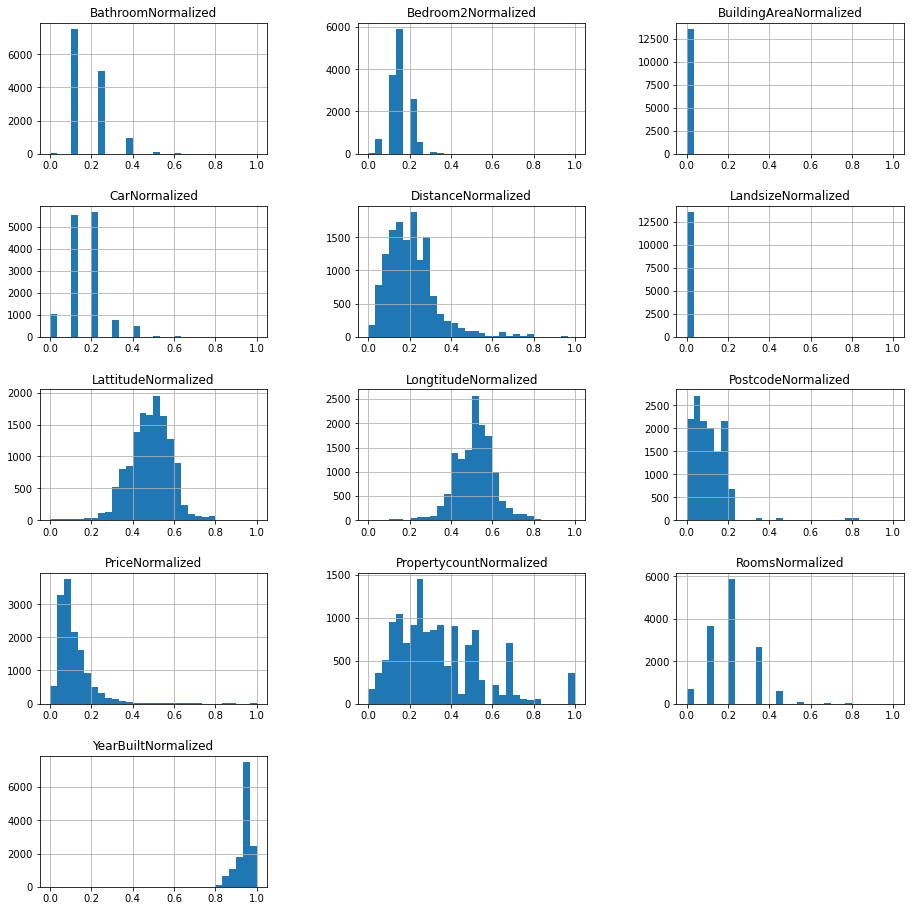

In [7]:
draw_histogram(dfMod,"HistogramModified")

## Histogram of comparison

In [8]:
# combining two dataframes
dfComb = pd.concat([df2, dfMod], axis=1)
dfComb = dfComb[sorted(dfComb)]

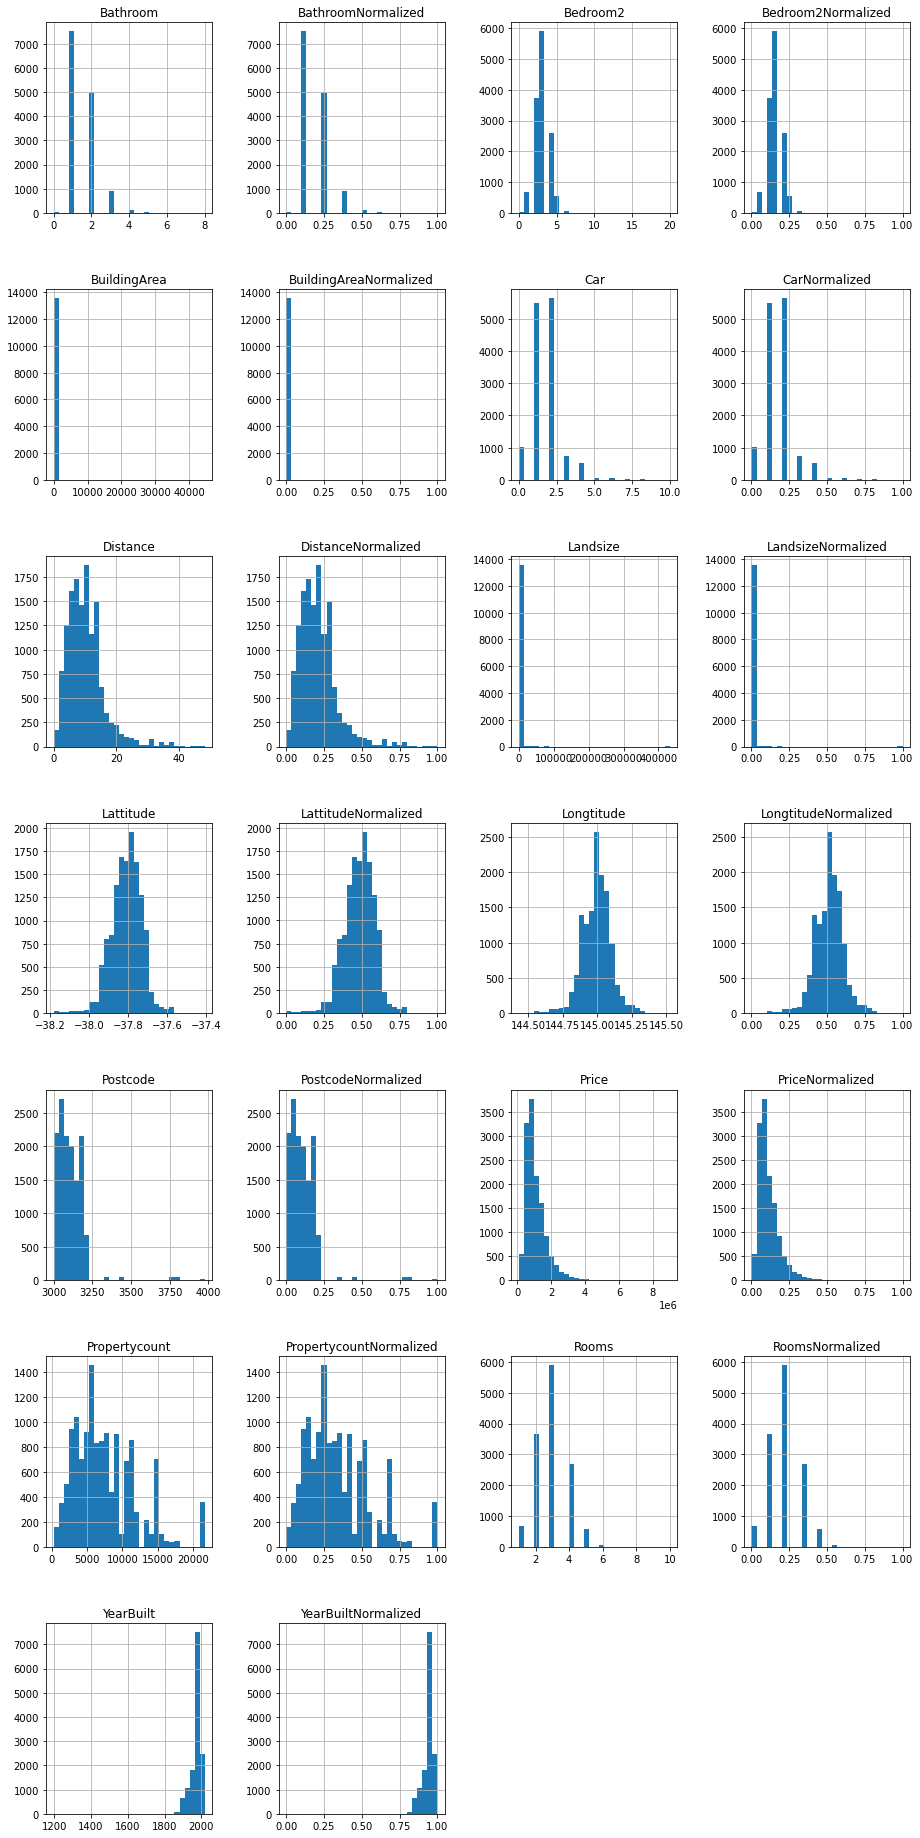

In [11]:
# Histogram of raw data and normalized data on separate plots one next to another
draw_histogram(dfComb,name="", n=10, m=4, top=2.5, dpi = 2100)

In [ ]:

# Histogram of raw data and normalized data on the same plot
for i, column in enumerate(df2.columns):
    comb = np.concatenate([[df2[column].to_numpy()], [dfMod[f"{column}Normalized"].to_numpy()]], axis=0)
    comb = comb.reshape(len(df2[column].to_numpy()), 2)
    ax = plt.subplot(14,1,i + 1)
    df[column].hist(ax = ax, bins = 30, color=["red"], alpha = 0.5, figsize = (10, 10), label=[column], histtype="bar")
    dfMod[f"{column}Normalized"].hist(ax = ax, bins = 30, color=["green"], figsize = (10, 10), alpha = 0.5, label=[f"{column}Normalized"], histtype="bar")
    ax.legend(prop={'size': 10}, loc = "upper left")
    ax.set_title(f"{column} vs Normalized {column}")
plt.subplots_adjust(left=0.1, bottom=0.5, right=0.7, top=5.2, wspace=0.4, hspace=0.4)
plt.show()